In [1]:
import pandas as pd
import json

import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time

fileName = 'exportUsageAllNoHeuristic.json'

usage = pd.read_json(fileName, orient='records')
usingPackages = usage[usage['PackagesUsedCount'] > 0]

Y = []

for pu in usingPackages['PercentageUsed']:
    sum = 0
    total = 0
    for key,value in pu.items():
        if value > 0:
            sum = sum + value
            total = total + 1.0      
    if total > 0:
        Y.append(sum/total)

Y = np.array(Y)

CPU times: user 13.6 s, sys: 1.37 s, total: 15 s
Wall time: 15.2 s


[ 23556.  35803.  43844.  39873.  27425.  27299.  17901.  16394.  15098.
  17005.  14086.  12415.   9082.  12300.  12380.  11413.   7041.   5511.
   6298.   4842.   4989.   3145.   2058.   2910.   1522.   1009.    476.
  21813.] [ 0.00209205  0.03773162  0.07337119  0.10901076  0.14465033  0.1802899
  0.21592947  0.25156904  0.28720861  0.32284818  0.35848775  0.39412732
  0.42976689  0.46540646  0.50104603  0.53668559  0.57232516  0.60796473
  0.6436043   0.67924387  0.71488344  0.75052301  0.78616258  0.82180215
  0.85744172  0.89308129  0.92872086  0.96436043  1.        ]


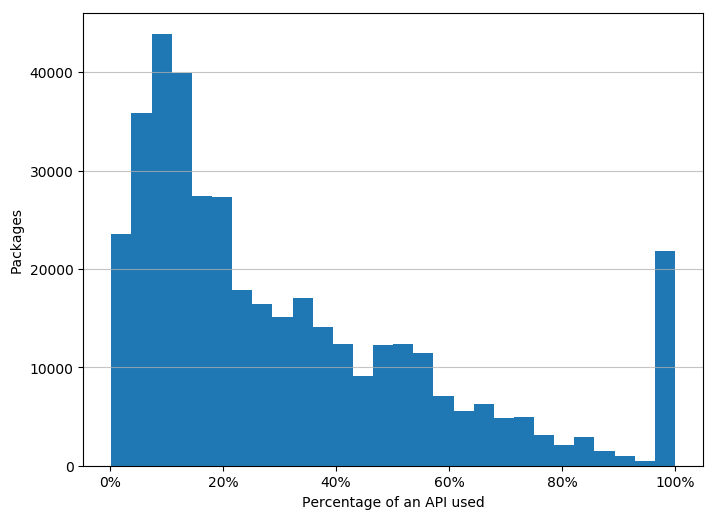

In [3]:
plt.figure(figsize=(8,6), dpi=100)
n, bins, patches = plt.hist(Y, bins='doane')
plt.grid(axis='y', alpha=0.75)
plt.gca().set_xticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_xticks()]) 
plt.xlabel('Percentage of an API used')
plt.ylabel('Packages')
print(n,bins)
plt.savefig('{}.png'.format(fileName))

In [4]:
%%time
packageCosts = pd.read_csv("packageCost.csv")

packageCostMap = {}

for index, row in packageCosts.iterrows():
    pkg = row['package']
    packageCostMap[pkg] = row['cost']

CPU times: user 56.6 s, sys: 215 ms, total: 56.8 s
Wall time: 56.9 s


In [5]:
%%time
costSavings = []

for pu in usingPackages['PercentageUsed']:
    sumCosts = 0
    for key,value in pu.items():
        if value > 0 and value <= 0.1:
            if key in packageCostMap:
                cost = packageCostMap[key]
                # adds removed package itself to the savings
                sumCosts = sumCosts + cost + 1
    costSavings.append(sumCosts)

costSavings = np.array(costSavings)

CPU times: user 729 ms, sys: 51 µs, total: 729 ms
Wall time: 729 ms


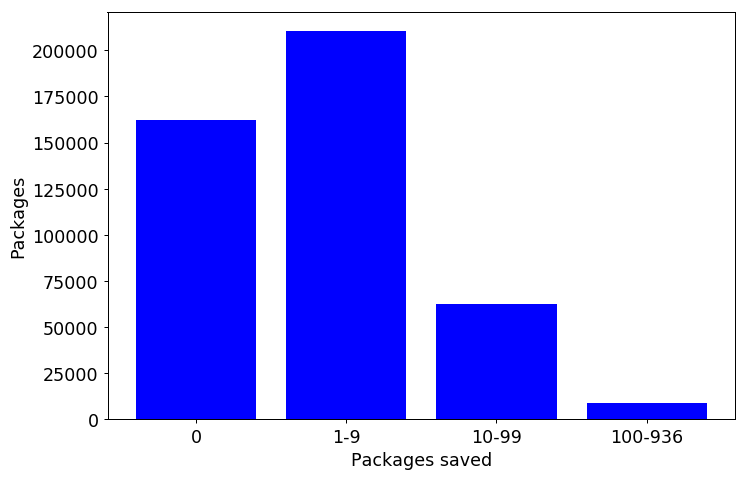

In [6]:
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

bars = [
    costSavings[costSavings == 0],
    costSavings[(costSavings >= 1) & (costSavings <= 9)], 
    costSavings[(costSavings >= 10) & (costSavings <= 99)],
    costSavings[(costSavings >= 100) & (costSavings <= 999)]
]

Y = []

for b in bars:
    Y.append(len(b))
X = np.arange(0, len(Y), step=1)

maxSize = costSavings.max()

plt.figure(figsize=(9,6), dpi=90)
plt.bar(X, Y, color="blue")

# for x,y in zip(X,Y):
#     plt.text(x, y, y, ha='center', va= 'bottom')

# plt.ylim(0, 700000)
plt.xticks(np.arange(0, len(Y), step=1), ['0', '1-9',  '10-99', '100-{}'.format(maxSize)])
plt.xlabel('Packages saved')
plt.ylabel('Packages')
plt.savefig('costSavings.png')